In [2]:
import pandas as pd

In [3]:
sf=pd.read_csv("machine.data.csv",header=None)
sf.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
type(sf)

pandas.core.frame.DataFrame

In [20]:
sf.columns=['vendor name','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']


In [6]:
sf.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [7]:
sf.shape

(209, 10)

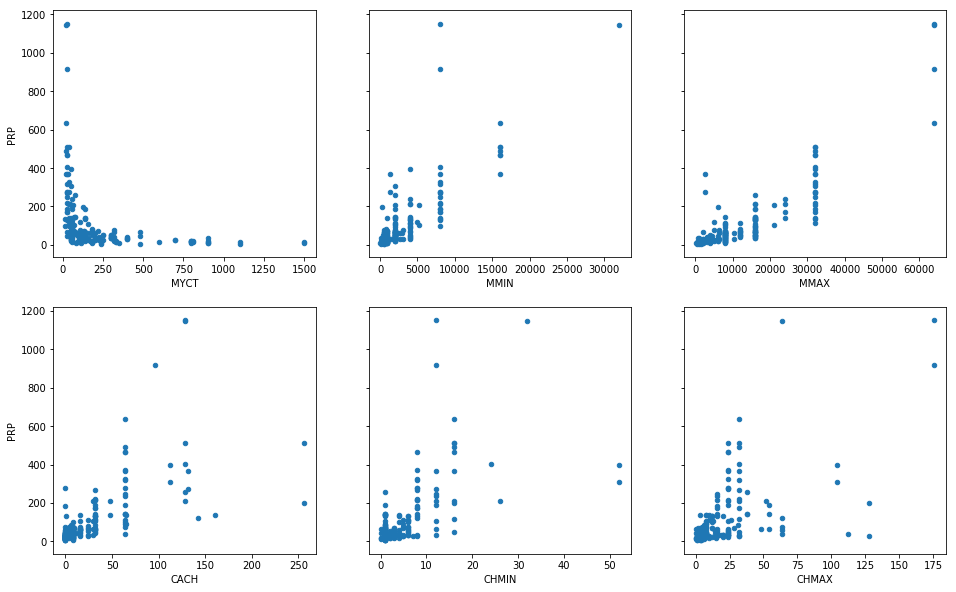

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
# attributes=sf2
fig, axs=plt.subplots(2,3,sharey=True)
sf.plot(kind='scatter',x='MYCT',y='PRP',ax=axs[0][0],figsize=(16,10))

sf.plot(kind='scatter',x='MMIN',y='PRP',ax=axs[0][1],figsize=(16,10))
sf.plot(kind='scatter',x='MMAX',y='PRP',ax=axs[0][2],figsize=(16,10))
sf.plot(kind='scatter',x='CACH',y='PRP',ax=axs[1][0],figsize=(16,10))
sf.plot(kind='scatter',x='CHMIN',y='PRP',ax=axs[1][1],figsize=(16,10))
sf.plot(kind='scatter',x='CHMAX',y='PRP',ax=axs[1][2],figsize=(16,10))
plt.savefig('matrix.png')

In [14]:
feature_cols=[ 'MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
X=sf[feature_cols]
y=sf['PRP']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,)
lm.fit(X_train,y_train)

#y_train.head(5)
# y_train.shape


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# zip(feature_cols,lm.coef_)
from sklearn.metrics import mean_squared_error

In [19]:
y_pred=lm.predict(X_test)

In [17]:
mean_squared_error(y_test,y_pred)

16733.444105426363